In [355]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.under_sampling import NearMiss
from scipy.stats import chi2_contingency

In [356]:
df = pd.read_csv("train.csv")
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [357]:
df.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,...,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [358]:
len(df.columns)

35

In [359]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [360]:
df.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [361]:
df.shape

(67463, 35)

In [362]:
df.size

2361205

In [363]:
df.min()


ID                                   1297933
Loan Amount                             1014
Funded Amount                           1014
Funded Amount Investor           1114.590204
Term                                      36
Batch Enrolled                    BAT1104812
Interest Rate                       5.320006
Grade                                      A
Sub Grade                                 A1
Employment Duration                 MORTGAGE
Home Ownership                   14573.53717
Verification Status             Not Verified
Payment Plan                               n
Loan Title                          Bathroom
Debit to Income                     0.675299
Delinquency - two years                    0
Inquires - six months                      0
Open Account                               2
Public Record                              0
Revolving Balance                          0
Revolving Utilities                 0.005172
Total Accounts                             4
Initial Li

In [364]:
df.max()

ID                                 72245779
Loan Amount                           35000
Funded Amount                         34999
Funded Amount Investor          34999.74643
Term                                     59
Batch Enrolled                   BAT5924421
Interest Rate                     27.182348
Grade                                     G
Sub Grade                                G5
Employment Duration                    RENT
Home Ownership                  406561.5364
Verification Status                Verified
Payment Plan                              n
Loan Title                         vacation
Debit to Income                   39.629862
Delinquency - two years                   8
Inquires - six months                     5
Open Account                             37
Public Record                             4
Revolving Balance                    116933
Revolving Utilities               100.88005
Total Accounts                           72
Initial List Status             

In [365]:
df.describe()


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


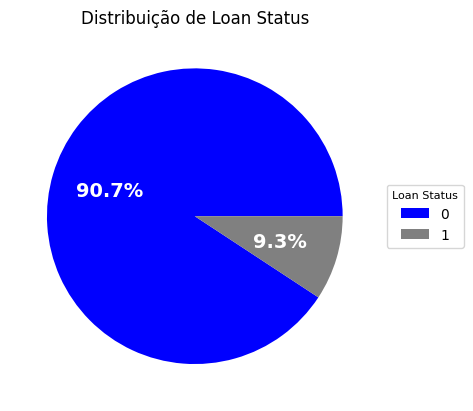

In [366]:
loan_status_counts = df["Loan Status"].value_counts()

# Criar uma lista de cores para cada setor
colors = ['blue', 'grey']

# Criar o gráfico de pizza
plt.pie(loan_status_counts, labels=loan_status_counts.index, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'})

# Adicionar um título
plt.title('Distribuição de Loan Status', fontsize=12)
plt.legend(loan_status_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Mostrar o gráfico
plt.show()

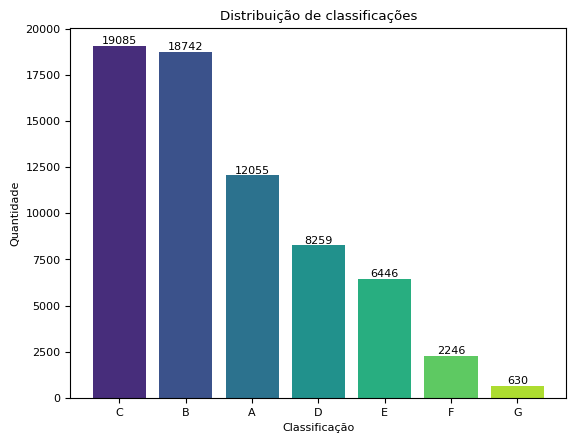

In [367]:
# Contar a ocorrência de cada valor na coluna "Loan Status"
grade_counts = df["Grade"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Classificação")
plt.ylabel("Quantidade")
plt.title("Distribuição de classificações")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

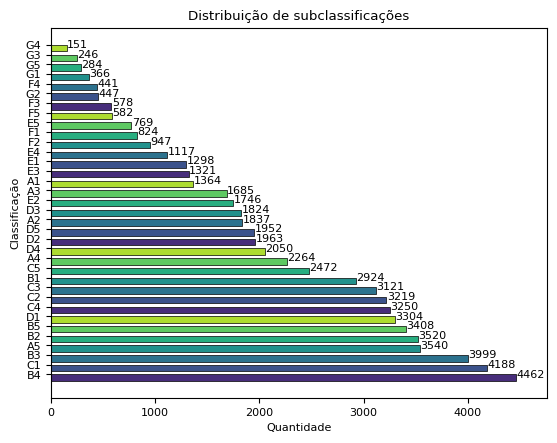

In [368]:
# Ajuste o tamanho da fonte
plt.rcParams.update({'font.size': 8})

# Seu código para obter os dados
grade_counts = df["Sub Grade"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Definir a largura das barras e o espaçamento
bar_width = 0.8  # Largura das barras
bar_spacing = 0.4  # Ajuste o valor para aumentar ou diminuir o espaçamento entre as barras

# Calcular a posição ajustada para cada barra
positions = range(len(grade_counts))
bar_positions = [pos * (bar_width + bar_spacing) for pos in positions]

# Criar o gráfico de barras horizontal com espaçamento
plt.barh(bar_positions, grade_counts, color=colors, height=bar_width, edgecolor='black', linewidth=0.5)

# Adicionar rótulos e título
plt.yticks([pos + bar_width / 2 for pos in bar_positions], grade_counts.index)  # Ajustar posições dos rótulos
plt.xlabel("Quantidade")
plt.ylabel("Classificação")
plt.title("Distribuição de subclassificações")

# Adicionar anotações nas barras
for i, value in zip(bar_positions, grade_counts):
    plt.text(value + 5, i + bar_width / 2, str(value), ha='left', va='center')

# Ajustar os limites do eixo x para acomodar os rótulos
plt.xlim(0, max(grade_counts) + 300)

# Mostrar o gráfico
plt.show()


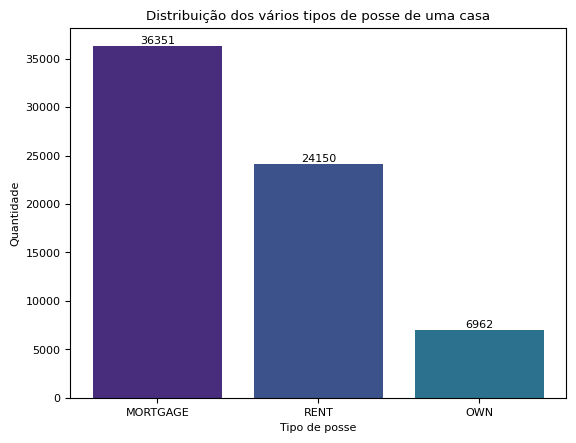

In [369]:
grade_counts = df["Employment Duration"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Tipo de posse")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários tipos de posse de uma casa")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

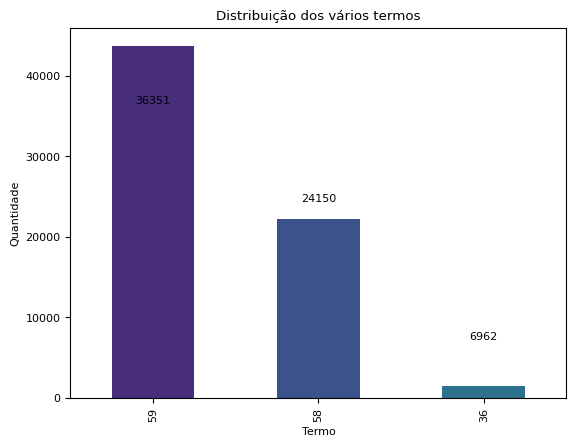

In [370]:
df["Term"].value_counts().plot.bar(color=colors)
colors = sns.color_palette("viridis", 7)
plt.xlabel("Termo")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários termos")
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

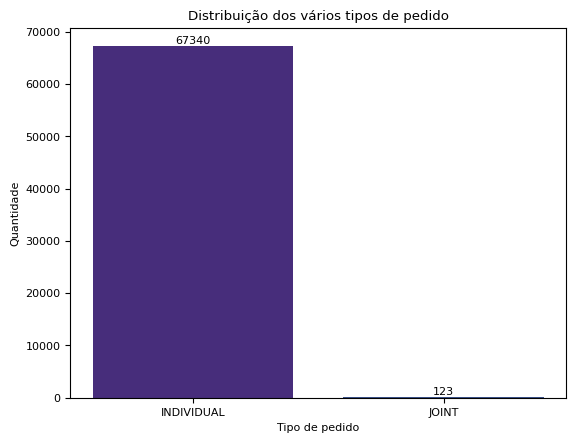

In [371]:
grade_counts = df["Application Type"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Tipo de pedido")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários tipos de pedido")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

In [372]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [373]:
df.isna().sum().sum()


0

In [374]:
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [375]:
df.drop_duplicates(inplace=True)

In [376]:
df.iloc[:, [0] + list(range(9, 11))]

,ID,Employment Duration,Home Ownership
0,65087372,MORTGAGE,176346.62670
1,1450153,RENT,39833.92100
2,1969101,MORTGAGE,91506.69105
3,6651430,MORTGAGE,108286.57590
4,14354669,MORTGAGE,44234.82545
...,...,...,...
67458,16164945,MORTGAGE,83961.15003
67459,35182714,RENT,65491.12817
67460,16435904,MORTGAGE,34813.96985
67461,5300325,OWN,96938.83564


In [377]:
desired_values = ['RENT', 'MORTGAGE', 'OWN']

has_desired_value = any(df.loc[0, 'Home Ownership'] == val for val in desired_values)

if has_desired_value:
    print(df.iloc[:, [0] + list(range(9, 11))])
else:
    df.rename(columns={'Home Ownership': 'Employment DurationAux'}, inplace=True)
    df.rename(columns={'Employment Duration': 'Home Ownership'}, inplace=True)
    df.rename(columns={'Employment DurationAux': 'Employment Duration'}, inplace=True)

In [378]:
df['Loan Title'] = df['Loan Title'].str.lower()
len(df['Loan Title'].unique())
df['Loan Title'].unique()

array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'green loan', 'other',
       'moving and relocation', 'credit cards', 'medical expenses',
       'refinance', 'credit card consolidation', 'lending club',
       'debt consolidation loan', 'major purchase', 'vacation',
       'business', 'credit card payoff', 'credit card',
       'credit card refi', 'personal loan', 'cc refi', 'consolidate',
       'medical', 'loan 1', 'consolidation', 'card consolidation',
       'car financing', 'debt', 'home buying', 'freedom', 'consolidated',
       'get out of debt', 'consolidation loan', 'dept consolidation',
       'personal', 'cards', 'bathroom', 'refi', 'credit card loan',
       'credit card debt', 'house', 'debt consolidation 2013',
       'debt loan', 'cc refinance', 'home', 'cc consolidation',
       'credit card refinance', 'credit loan', 'payoff',
       'bill consolidation', 'credit card paydown', 'credit card pay off',
       'g

In [379]:
map_dict = {'Loan Title':{'debt consolidation':'debt consolidation', \
                'debt consolidation loan':'debt consolidation', \
                'debt consolidation 2013':'debt consolidation', \
                'dept consolidation':'debt consolidation' ,
                'credit card refinancing':'credit card refinancing', \
                'refinance':'credit card refinancing', \
                'cc refinance':'credit card refinancing',\
                'credit card refinance':'credit card refinancing',\
                'cc-refinance':'credit card refinancing', \
                'refinance loan':'credit card refinancing', \
                'credit card refinance loan':'credit card refinancing',\
                'credit card refi':'credit card refinancing', \
                'cc refi':'credit card refinancing', \
                'refi':'credit card refinancing'  ,
                'home improvement':'home improvement',\
                'home improvement loan':'home improvement',\
                'bathroom':'home improvement',\
                'pool':'home improvement' ,
                'home buying':'home buy',\
                'house':'home buy',\
                'home':'home buy',\
                'home loan':'home buy' ,
                'credit consolidation':'credit consolidation',\
                'consolidation loan':'credit consolidation',\
                'cc consolidation':'credit consolidation',\
                'conso':'credit consolidation',\
                'credit card consolidation':'credit consolidation',\
                'card consolidation':'credit consolidation',\
                'loan consolidation':'credit consolidation',\
                'consolidate':'credit consolidation',\
                'consolidated':'credit consolidation' ,
                'medical':'medical purpose',\
                'medical expenses':'medical purpose',\
                'medical loan':'medical purpose'  ,
                'lending club' : 'lending purpose' , \
                'lending loan' : 'lending purpose'  ,
                'business' : 'business purpose' , \
                'green loan' : 'business purpose' , \
                'moving and relocation' : 'business purpose'  , \
                'credit cards' : 'credit cards payoff' , \
                'credit card' : 'credit cards payoff' , \
                'credit card loan' : 'credit cards payoff' , \
                'credit' : 'credit cards payoff' , \
                'credit card debt' : 'credit cards payoff' , \
                'cc loan' : 'credit cards payoff' , \
                'cc' : 'credit cards payoff' , \
                'cards' : 'credit cards payoff' , \
                'credit card payoff' : 'credit cards payoff' , \
                'credit pay off' : 'credit cards payoff' , \
                'credit payoff' : 'credit cards payoff' , \
                'credit loan' : 'credit cards payoff' , \
                'payoff' : 'credit cards payoff' , \
                'pay off' : 'credit cards payoff' , \
                'credit card paydown' : 'credit cards payoff' , \
                'credit card pay off' : 'credit cards payoff' ,
                'personal loan' : 'perosonal purpose' , \
                'personal' : 'perosonal purpose' , \
                'wedding loan' : 'perosonal purpose' , \
                'getting ahead' : 'perosonal purpose' , \
                'vacation' : 'perosonal purpose' , \
                'major purchase' : 'perosonal purpose'  , \
                'car financing' : 'vehicle purpose' , \
                'car loan' : 'vehicle purpose' , \
                'debt' : 'debt payoff' , \
                'get out of debt' : 'debt payoff' , \
                'debt loan' : 'debt payoff' , \
                'get debt free' : 'debt payoff' , \
                'debt payoff' : 'debt payoff' , \
                'debt free' : 'debt payoff' , \
                'freedom' : 'debt payoff' , \
                'relief' : 'debt payoff' , \
                'debt reduction' : 'debt payoff' , \
                'bill consolidation' : 'bill payoff' , \
                'bill payoff' : 'bill payoff' , \
                'pay off bills' : 'bill payoff' , \
                'bills' : 'bill payoff'  , \
                'other' : 'other purpose' , \
                'loan 1' : 'other purpose' , \
                'loan1' : 'other purpose' , \
                'loan' : 'other purpose' , \
                'myloan' : 'other purpose' , \
                'my loan' : 'other purpose' }
            }

In [380]:

df.replace(map_dict, inplace=True)
len(df['Loan Title'].unique())

15

In [381]:
df['Loan Title'].unique()

array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'business purpose',
       'other purpose', 'credit cards payoff', 'medical purpose',
       'lending purpose', 'perosonal purpose', 'consolidation',
       'vehicle purpose', 'debt payoff', 'home buy', 'bill payoff'],
      dtype=object)

In [382]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['Payment Plan'])
df = df.drop(columns=['Accounts Delinquent'])
df = df.drop(columns=['Batch Enrolled'])
df = df.drop(columns=['Application Type'])

In [383]:

colunas_nao_numericas = df.select_dtypes(exclude=['number']).columns

df[colunas_nao_numericas] = df[colunas_nao_numericas].apply(lambda x: x.str.lower().str.replace(' ', '') if x.dtype == 'O' else x)

print(df.head())

   Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

  Grade Sub Grade Home Ownership  Employment Duration Verification Status  \
0     b        c4       mortgage         176346.62670         notverified   
1     c        d3           rent          39833.92100      sourceverified   
2     f        d4       mortgage          91506.69105      sourceverified   
3     c        c3       mortgage         108286.57590      sourceverified   
4     c        d4       mortgage          44234.82545      sourceverified   

   ... Total Received Interest  Total Received Late Fee   Recoveries

In [384]:
#anova relationship between columns and target
def FunctionAnova (inpData, TargetVar, PredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[]  # empty list of final selected predictors
    print('##### ANOVA Results ##### \n')
    for predictor in PredictorList:
        CategoryGroupLists=inpData.groupby(TargetVar)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is < 0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVar, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVar, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)


##ANOVA TESTING -> usar apenas dados numéricos
numeric_data = df.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_data.remove('Loan Status')


##print(numeric_data)
SelectedPredictors = FunctionAnova(df, 'Loan Status', numeric_data)

print(f"Selected Prdictors: {SelectedPredictors}")

##### ANOVA Results ##### 

Loan Amount is NOT correlated with Loan Status | P-Value: 0.24532743370121238
Funded Amount is NOT correlated with Loan Status | P-Value: 0.7231120961020374
Funded Amount Investor is NOT correlated with Loan Status | P-Value: 0.9811486184162733
Term is NOT correlated with Loan Status | P-Value: 0.37582542132472074
Interest Rate is NOT correlated with Loan Status | P-Value: 0.4513394637979872
Employment Duration is NOT correlated with Loan Status | P-Value: 0.3344917102292555
Debit to Income is NOT correlated with Loan Status | P-Value: 0.42714577391898245
Delinquency - two years is correlated with Loan Status | P-Value: 0.009462634922992178
Inquires - six months is NOT correlated with Loan Status | P-Value: 0.8806176446325595
Open Account is NOT correlated with Loan Status | P-Value: 0.06620701987720404
Public Record is correlated with Loan Status | P-Value: 0.005946386493849328
Revolving Balance is NOT correlated with Loan Status | P-Value: 0.78043535653288

In [385]:
def chi_square_test(data, target_column):
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    #categorical_columns.remove(target_column)  # Remove the target variable
    
    significant_vars = []
    print("Chi-Square Test Results\n")

    for column in categorical_columns:
        # Create a contingency table
        contingency_table = pd.crosstab(data[column], data[target_column])
        
        # Apply the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Print the results
        print(f"{column} vs {target_column}")
        print(f"Chi2 value: {chi2}, P-value: {p}\n")

        # If p-value is < 0.05, consider it as significant
        if p < 0.05:
            significant_vars.append(column)
            
    return significant_vars

# Use the function
significant_predictors = chi_square_test(df, 'Loan Status')
print("Significantly associated variables with Status:", significant_predictors)

Chi-Square Test Results

Grade vs Loan Status
Chi2 value: 14.024785837884542, P-value: 0.029360514462449295

Sub Grade vs Loan Status
Chi2 value: 33.22818832002119, P-value: 0.5052675609219766

Home Ownership vs Loan Status
Chi2 value: 16.101583241640988, P-value: 0.00031884941471389697

Verification Status vs Loan Status
Chi2 value: 0.6606479264176166, P-value: 0.718690866314581

Loan Title vs Loan Status
Chi2 value: 18.494130654335216, P-value: 0.1851930885841406

Initial List Status vs Loan Status
Chi2 value: 12.101443058821943, P-value: 0.0005038281525924869

Significantly associated variables with Status: ['Grade', 'Home Ownership', 'Initial List Status']


In [386]:
colunas = ['Employment Duration', 'Interest Rate', 'Inquires - six months', 'Total Accounts',
               'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 
               'Collection Recovery Fee', 'Collection 12 months Medical', 
               'Total Collection Amount', 'Total Revolving Credit Limit']

for coluna in colunas:
  Q1 = df[coluna].quantile(q = 0.25)
  Q3 = df[coluna].quantile(q = 0.75)
  IQR = Q3 - Q1
  superior = Q3 + 1.5 * IQR
  inferior = Q1 - 1.5 * IQR
  df.drop( df.loc[ df[coluna] > superior ].index, axis = 0, inplace = True )
  df.drop( df.loc[ df[coluna] < inferior ].index, axis = 0, inplace = True )

In [387]:
colunasC = ['Delinquency - two years', 
        'Public Record', 
        'Total Received Late Fee', 
        'Total Collection Amount', 
        'Total Current Balance', 
        'Grade', 
        'Sub Grade', 
        'Home Ownership', 
        'Initial List Status',
        'Loan Status']

dfN = df[colunasC]

dfN.shape

(40580, 10)

In [388]:
df.drop(['Collection 12 months Medical', 'Inquires - six months'], axis = 1, inplace = True)

In [389]:
colunas_nao_numericas = dfN.select_dtypes(exclude=['number']).columns

dfN = pd.get_dummies(dfN, columns=colunas_nao_numericas, drop_first=True)

dfN.replace({False: 0, True: 1}, inplace=True)

print(dfN.head())

   Delinquency - two years  Public Record  Total Received Late Fee  \
1                        0              0                 0.036181   
3                        1              0                 0.044131   
7                        0              0                 0.044965   
8                        0              0                 0.017106   
9                        1              0                 0.008338   

   Total Collection Amount  Total Current Balance  Loan Status  Grade_b  \
1                       53                 182610            0        0   
3                       40                   9189            0        0   
7                       48                 184909            0        0   
8                       26                  68126            0        0   
9                       35                  71650            0        0   

   Grade_c  Grade_d  Grade_e  ...  Sub Grade_f4  Sub Grade_f5  Sub Grade_g1  \
1        1        0        0  ...             0  

In [390]:
numerical_cols = dfN.select_dtypes(include=['int64', 'float64']).columns.to_list()
if 'Loan Status' in numerical_cols:
    numerical_cols.remove('Loan Status')
underS = NearMiss(sampling_strategy='auto')
#underS = RandomUnderSampler(random_state=42) 

X = dfN.drop('Loan Status', axis=1)
y = dfN['Loan Status']
#X, y= underS.fit_resample(X, y)



In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



X_train, y_train = underS.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=35)  # Número de vizinhos

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisão: {accuracy_knn}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)

Precisão: 0.5421389847215377

Matriz de Confusão:
[[4059 3319]
 [ 397  341]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69      7378
           1       0.09      0.46      0.16       738

    accuracy                           0.54      8116
   macro avg       0.50      0.51      0.42      8116
weighted avg       0.84      0.54      0.64      8116



In [392]:
svm_model = SVC(random_state=42)  

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Resultados do Modelo SVM:")
print(f"Precisão: {accuracy_svm}")
print("\nMatriz de Confusão:")
print(conf_matrix_svm)
print("\nRelatório de Classificação:")
print(class_report_svm)


Resultados do Modelo SVM:
Precisão: 0.49901429275505177

Matriz de Confusão:
[[3696 3682]
 [ 384  354]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.50      0.65      7378
           1       0.09      0.48      0.15       738

    accuracy                           0.50      8116
   macro avg       0.50      0.49      0.40      8116
weighted avg       0.83      0.50      0.60      8116



In [393]:
nb_model = GaussianNB() 
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Precisão (Naive Bayes): {accuracy_nb}")
print("\nMatriz de Confusão (Naive Bayes):")
print(conf_matrix_nb)
print("\nRelatório de Classificação (Naive Bayes):")
print(class_report_nb)


Precisão (Naive Bayes): 0.5303104977821587

Matriz de Confusão (Naive Bayes):
[[3960 3418]
 [ 394  344]]

Relatório de Classificação (Naive Bayes):
              precision    recall  f1-score   support

           0       0.91      0.54      0.68      7378
           1       0.09      0.47      0.15       738

    accuracy                           0.53      8116
   macro avg       0.50      0.50      0.41      8116
weighted avg       0.84      0.53      0.63      8116



In [394]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f"Precisão (Logistic Regression): {accuracy_lr}")
print("\nMatriz de Confusão (Logistic Regression):")
print(conf_matrix_lr)
print("\nRelatório de Classificação (Logistic Regression):")
print(class_report_lr)


Precisão (Logistic Regression): 0.4558896007885658

Matriz de Confusão (Logistic Regression):
[[3284 4094]
 [ 322  416]]

Relatório de Classificação (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.45      0.60      7378
           1       0.09      0.56      0.16       738

    accuracy                           0.46      8116
   macro avg       0.50      0.50      0.38      8116
weighted avg       0.84      0.46      0.56      8116



In [395]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_report_bagging = classification_report(y_test, y_pred_bagging)

print(f"Precisão (Bagging Classifier): {accuracy_bagging}")
print("\nMatriz de Confusão (Bagging Classifier):")
print(conf_matrix_bagging)
print("\nRelatório de Classificação (Bagging Classifier):")
print(class_report_bagging)

Precisão (Bagging Classifier): 0.40882207984228686

Matriz de Confusão (Bagging Classifier):
[[2844 4534]
 [ 264  474]]

Relatório de Classificação (Bagging Classifier):
              precision    recall  f1-score   support

           0       0.92      0.39      0.54      7378
           1       0.09      0.64      0.16       738

    accuracy                           0.41      8116
   macro avg       0.50      0.51      0.35      8116
weighted avg       0.84      0.41      0.51      8116



In [396]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Precisão (Random Forest): {accuracy_rf}")
print("\nMatriz de Confusão (Random Forest):")
print(conf_matrix_rf)
print("\nRelatório de Classificação (Random Forest):")
print(class_report_rf)

Precisão (Random Forest): 0.38873829472646626

Matriz de Confusão (Random Forest):
[[2687 4691]
 [ 270  468]]

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.36      0.52      7378
           1       0.09      0.63      0.16       738

    accuracy                           0.39      8116
   macro avg       0.50      0.50      0.34      8116
weighted avg       0.83      0.39      0.49      8116



In [397]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_report_adaboost = classification_report(y_test, y_pred_adaboost)

print(f"Precisão (AdaBoost): {accuracy_adaboost}")
print("\nMatriz de Confusão (AdaBoost):")
print(conf_matrix_adaboost)
print("\nRelatório de Classificação (AdaBoost):")
print(class_report_adaboost)


Precisão (AdaBoost): 0.39366683095120747

Matriz de Confusão (AdaBoost):
[[2729 4649]
 [ 272  466]]

Relatório de Classificação (AdaBoost):
              precision    recall  f1-score   support

           0       0.91      0.37      0.53      7378
           1       0.09      0.63      0.16       738

    accuracy                           0.39      8116
   macro avg       0.50      0.50      0.34      8116
weighted avg       0.83      0.39      0.49      8116



In [398]:
gradientboost_model = GradientBoostingClassifier(random_state=42)
gradientboost_model.fit(X_train, y_train)

y_pred_gradientboost = gradientboost_model.predict(X_test)

accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
conf_matrix_gradientboost = confusion_matrix(y_test, y_pred_gradientboost)
class_report_gradientboost = classification_report(y_test, y_pred_gradientboost)

print(f"Precisão (Gradient Boosting): {accuracy_gradientboost}")
print("\nMatriz de Confusão (Gradient Boosting):")
print(conf_matrix_gradientboost)
print("\nRelatório de Classificação (Gradient Boosting):")
print(class_report_gradientboost)

Precisão (Gradient Boosting): 0.3791276490882208

Matriz de Confusão (Gradient Boosting):
[[2601 4777]
 [ 262  476]]

Relatório de Classificação (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.91      0.35      0.51      7378
           1       0.09      0.64      0.16       738

    accuracy                           0.38      8116
   macro avg       0.50      0.50      0.33      8116
weighted avg       0.83      0.38      0.48      8116



In [399]:
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
class_report_xgboost = classification_report(y_test, y_pred_xgboost)

print(f"Precisão (XGBoost): {accuracy_xgboost}")
print("\nMatriz de Confusão (XGBoost):")
print(conf_matrix_xgboost)
print("\nRelatório de Classificação (XGBoost):")
print(class_report_xgboost)

Precisão (XGBoost): 0.37185805815672746

Matriz de Confusão (XGBoost):
[[2535 4843]
 [ 255  483]]

Relatório de Classificação (XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.34      0.50      7378
           1       0.09      0.65      0.16       738

    accuracy                           0.37      8116
   macro avg       0.50      0.50      0.33      8116
weighted avg       0.83      0.37      0.47      8116



In [400]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Precisão (LightGBM): {accuracy_lgb}")
print("\nMatriz de Confusão (LightGBM):")
print(conf_matrix_lgb)
print("\nRelatório de Classificação (LightGBM):")
print(class_report_lgb)

[LightGBM] [Info] Number of positive: 2951, number of negative: 2951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5902, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Precisão (LightGBM): 0.3807294233612617

Matriz de Confusão (LightGBM):
[[2605 4773]
 [ 253  485]]

Relatório de Classificação (LightGBM):
              precision    recall  f1-score   support

           0       0.91      0.35      0.51      7378
           1       0.09      0.66      0.16       738

    accuracy                           0.38      8116
   macro avg       0.50      0.51      0.34      8116
weighted avg       0.84      0.38      0.48      8116



In [401]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('NB',GaussianNB()))
models.append(('BC',BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('XB', XGBClassifier()))
models.append(('LB',LGBMClassifier()))
models.append(('SVM', SVC()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []
values = []

for name, model in models:
    kfold = KFold(n_splits=50, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    values.append(round(cv_results.mean(), 2))
    print(f'{name} + ":" + {cv_results.mean()} + ":" + {cv_results.std()}')

LR + ":" + 0.7043327161373023 + ":" + 0.04011295924150777
KNN + ":" + 0.5343911123771543 + ":" + 0.04935751945724128
NB + ":" + 0.6382580828941746 + ":" + 0.04325052253977485
BC + ":" + 0.6794060675117504 + ":" + 0.03922364113775061
RF + ":" + 0.6970346104543512 + ":" + 0.04041256919530462
AB + ":" + 0.713475288420453 + ":" + 0.03719854657716308
XB + ":" + 0.6953453923942458 + ":" + 0.04007349402299122
[LightGBM] [Info] Number of positive: 2893, number of negative: 2890
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5783, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500259 -> initscore=0.001038
[LightGBM] [Info] Start training from score 0.001038
[LightGBM] [Info] Number of positive: 2884, number of negative: 2899
[LightGBM] [Info] Auto-choosing col-w

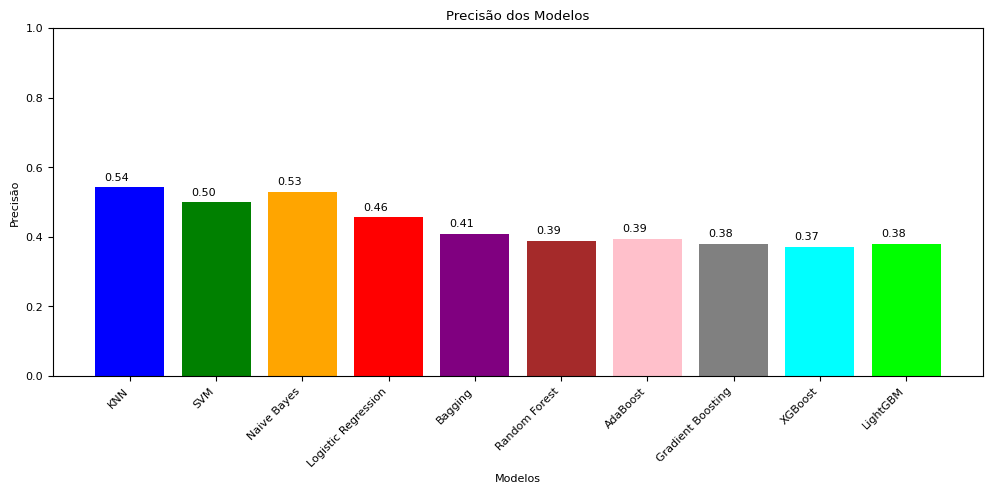

In [402]:

accuracies = {
    'KNN': accuracy_knn,
    'SVM': accuracy_svm,
    'Naive Bayes': accuracy_nb,
    'Logistic Regression': accuracy_lr,
    'Bagging': accuracy_bagging,
    'Random Forest': accuracy_rf,
    'AdaBoost': accuracy_adaboost,
    'Gradient Boosting': accuracy_gradientboost,
    'XGBoost': accuracy_xgboost,
    'LightGBM': accuracy_lgb
}

colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'lime']

plt.figure(figsize=(12, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.title('Precisão dos Modelos')
plt.xlabel('Modelos')
plt.ylabel('Precisão')
plt.ylim(0, 1)  

for bar, value in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{value:.2f}', ha='center', color='black')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.show()

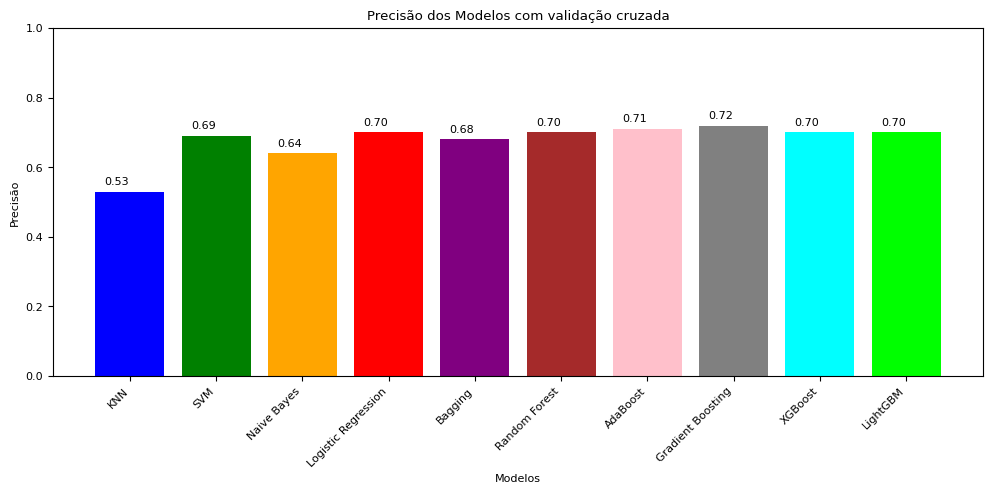

In [403]:
accuracies = {
    'KNN': values[1],
    'SVM': values[8],
    'Naive Bayes': values[2],
    'Logistic Regression': values[0],
    'Bagging': values[3],
    'Random Forest': values[4],
    'AdaBoost': values[5],
    'Gradient Boosting': values[9],
    'XGBoost': values[6],
    'LightGBM': values[7]
}

colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'lime']

plt.figure(figsize=(12, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.title('Precisão dos Modelos com validação cruzada')
plt.xlabel('Modelos')
plt.ylabel('Precisão')
plt.ylim(0, 1) 

for bar, value in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{value:.2f}', ha='center', color='black')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.show()